Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [7]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/06_Regression'
except ImportError as e:
    pass

# Introduction to Association Analysis

In this notebook, we will explore the first steps in association analysis, commonly used in data mining and market basket analysis. We will examine correlations between items, mine frequent itemsets, and generate association rules. The key metrics we will focus on are support, confidence, and lift, which provide insights into the relationships between items.


## Loading the Dataset

We'll start by loading a sample dataset representing customer transactions. Each row corresponds to a transaction, and each column to an item. A `1` indicates the item was purchased, and a `0` indicates it was not.


In [8]:
import pandas as pd

# Load the sample transactional dataset
df = pd.read_csv("supermarket.csv")
df.head()


,Kirsch,Milk,Bread,Butter,Cheese,Eggs,Apples,Bananas,Chicken,Beef,Fish,Flour
0,0,0,1,1,1,0,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,1,1,0,0,1,1,1,1,1
3,0,0,1,0,0,0,0,1,1,0,0,0
4,0,1,0,0,0,1,0,1,0,0,0,0


## Binary Correlation Analysis

To begin our analysis, we will calculate the Pearson correlation between the items. This will help us understand basic pairwise relationships. The correlation matrix is a useful visualization to show these relationships between all pairs of items.


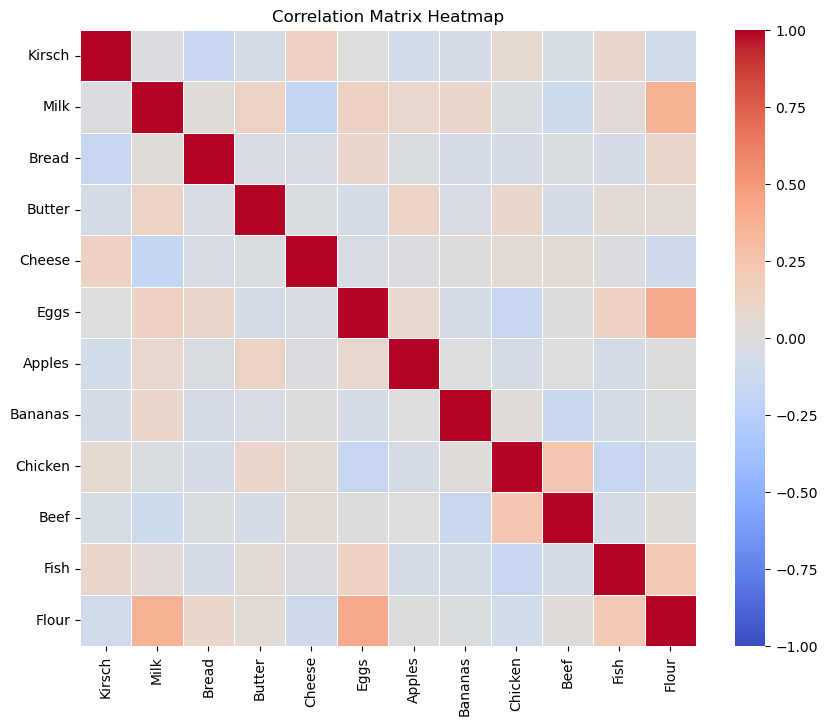

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap (without numbers)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Interpretation of the Correlation Matrix

The correlation matrix gives us a sense of how often items are purchased together. Values closer to 1 indicate a strong positive correlation, meaning the items are frequently bought together. Negative values suggest the items are rarely bought together. However, this approach isn't really useful for larger item sets:


In [10]:
import pandas as pd
from itertools import combinations

# Generate all unique triples of columns
column_triples = list(combinations(df.columns, 2))

# Dictionary to store the new columns
triple_columns = {}

# Compute all triple combinations and store in a dict
for col1, col2 in column_triples:
    new_col_name = f'{col1}_{col2}_bought'
    triple_columns[new_col_name] = df[col1] & df[col2]

# Convert the dict into a new DataFrame
df_triple_features = pd.DataFrame(triple_columns)

# Concatenate the original DataFrame and the new triple features
df_pairs = pd.concat([df, df_triple_features], axis=1)

# Display result
df_pairs.head()


,Kirsch,Milk,Bread,Butter,Cheese,Eggs,Apples,Bananas,Chicken,Beef,...,Bananas_Chicken_bought,Bananas_Beef_bought,Bananas_Fish_bought,Bananas_Flour_bought,Chicken_Beef_bought,Chicken_Fish_bought,Chicken_Flour_bought,Beef_Fish_bought,Beef_Flour_bought,Fish_Flour_bought
0,0,0,1,1,1,0,0,0,1,1,...,0,0,0,0,1,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


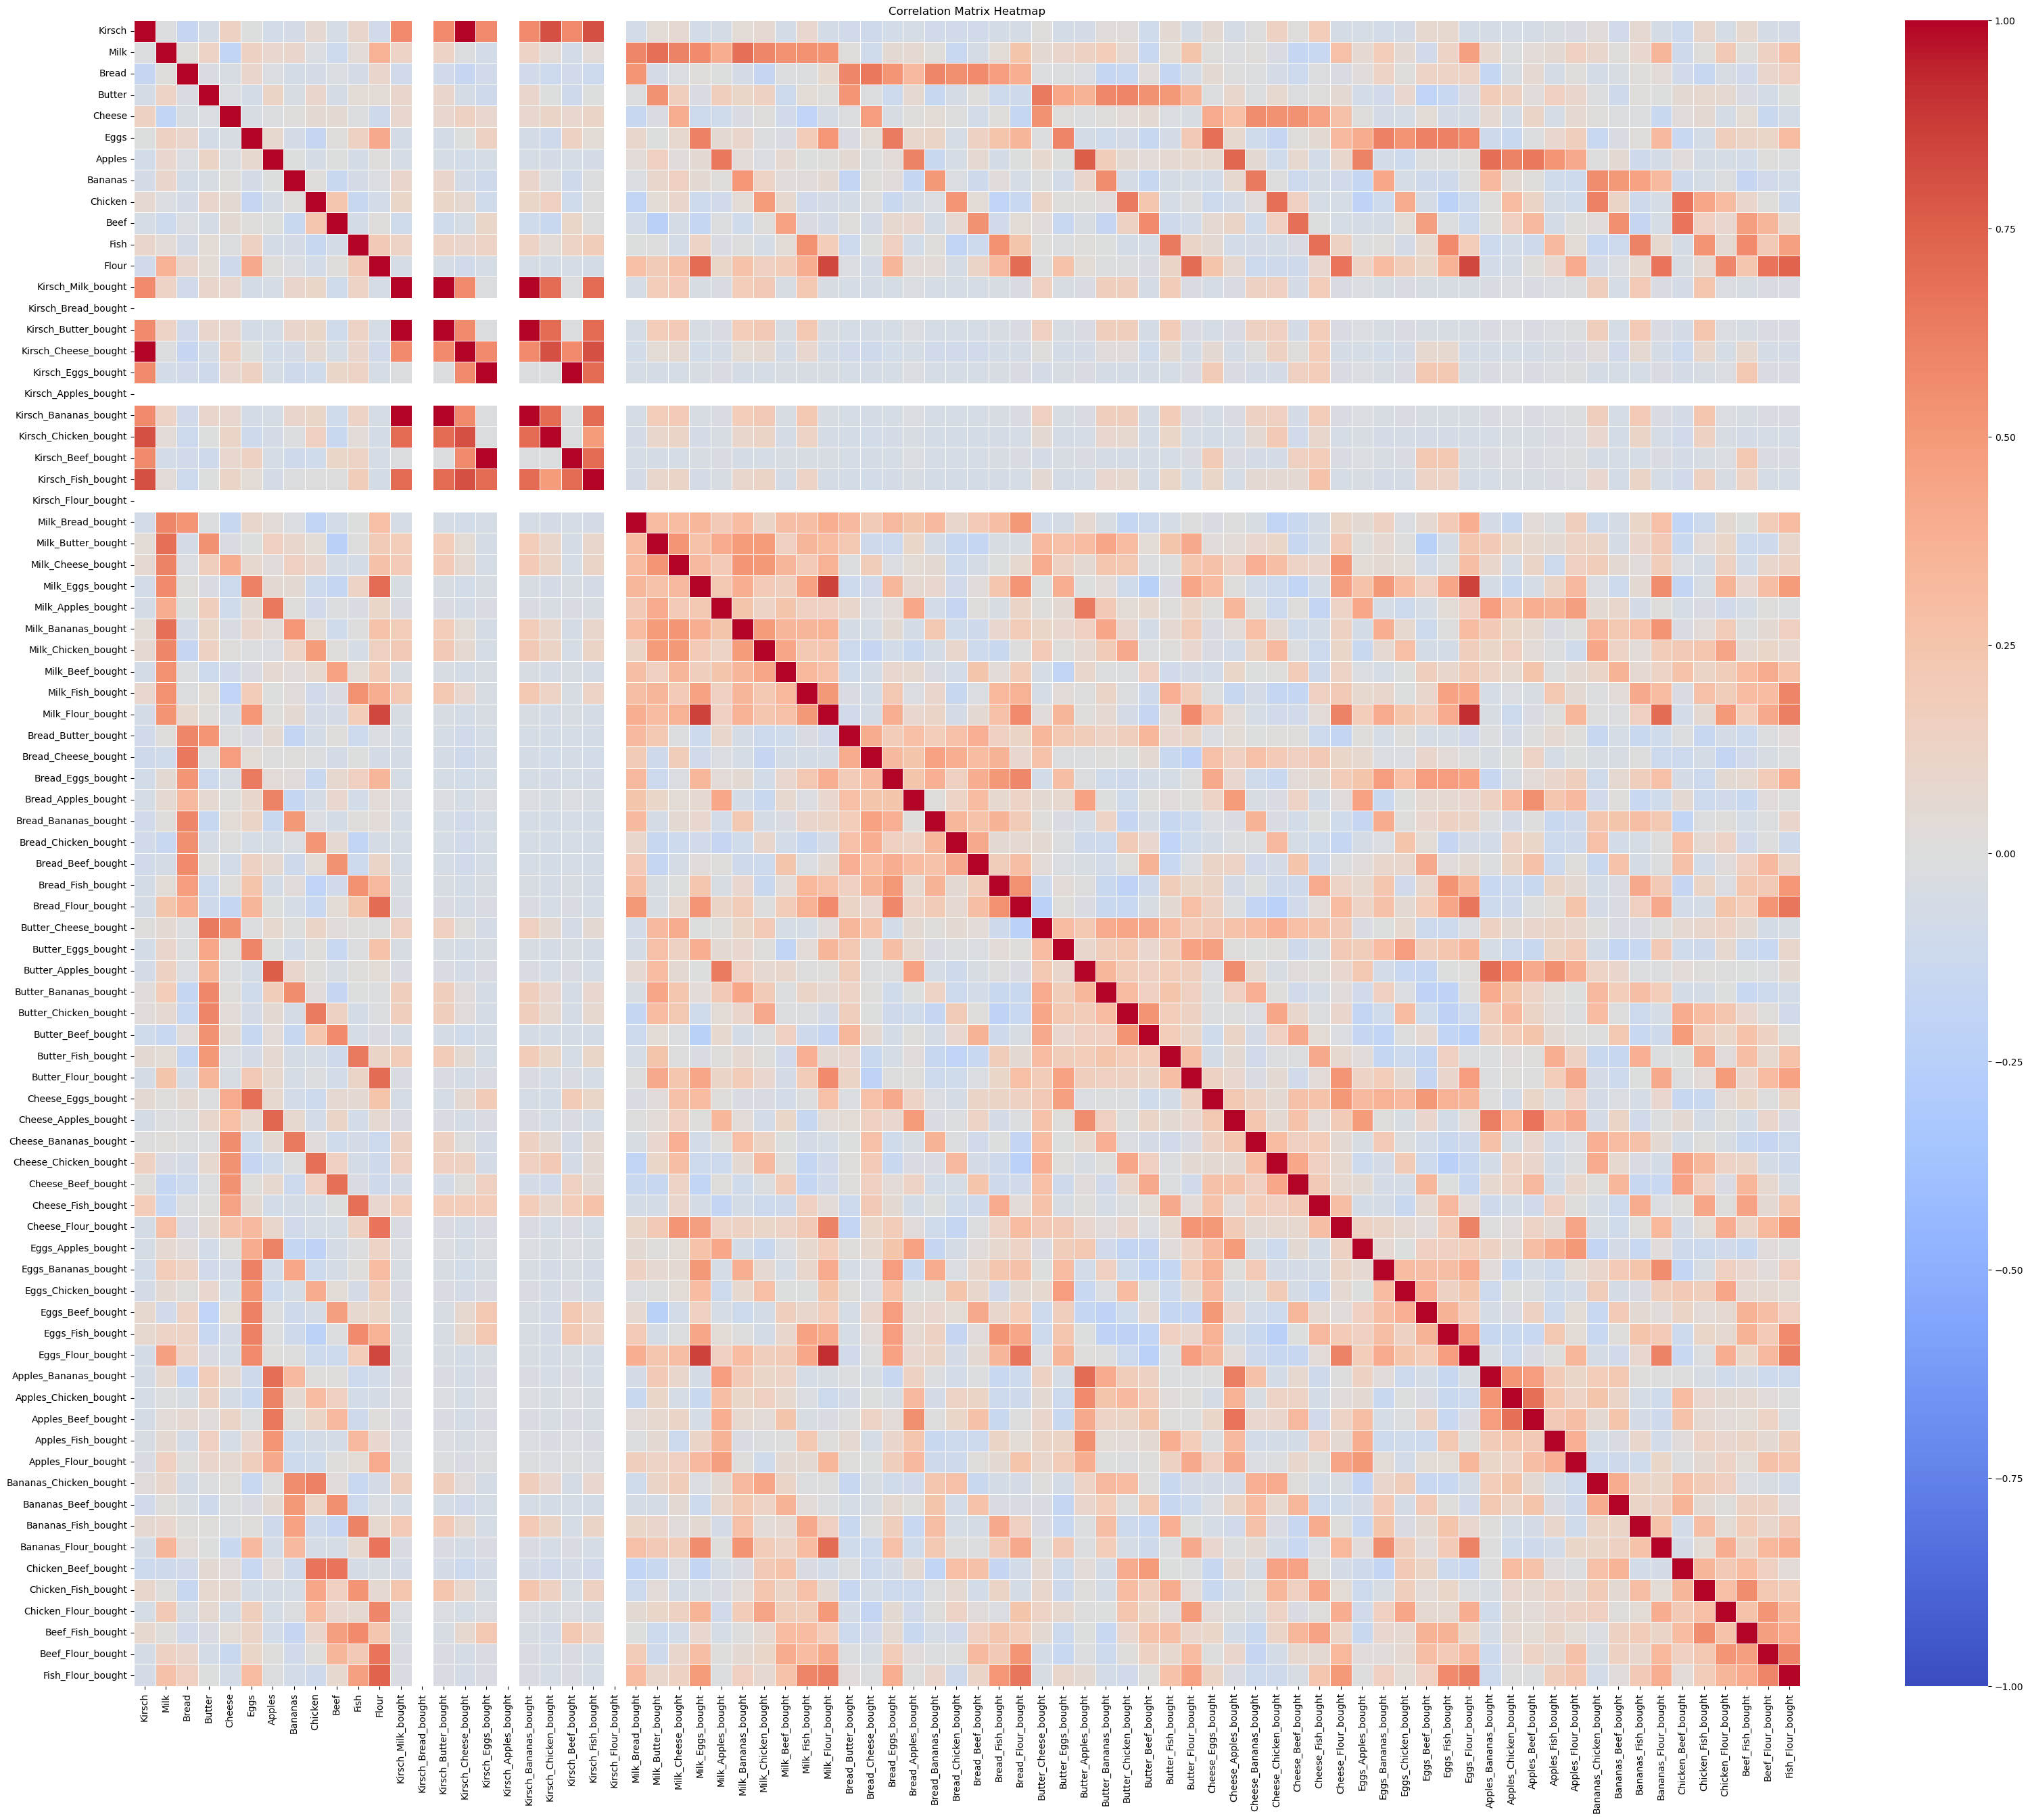

In [11]:
# Calculate the Pearson correlation matrix
correlation_matrix = df_pairs.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
import pandas as pd
from itertools import combinations

# Generate all unique triples of columns
column_triples = list(combinations(df.columns, 3))

# Dictionary to store the new columns
triple_columns = {}

# Compute all triple combinations and store in a dict
for col1, col2, col3 in column_triples:
    new_col_name = f'{col1}_{col2}_{col3}_all_bought'
    triple_columns[new_col_name] = df[col1] & df[col2] & df[col3]

# Convert the dict into a new DataFrame
df_triple_features = pd.DataFrame(triple_columns)

# Concatenate the original DataFrame and the new triple features
df_triples = pd.concat([df_pairs, df_triple_features], axis=1)

# Display result
df_triples.head()


,Kirsch,Milk,Bread,Butter,Cheese,Eggs,Apples,Bananas,Chicken,Beef,...,Bananas_Chicken_Beef_all_bought,Bananas_Chicken_Fish_all_bought,Bananas_Chicken_Flour_all_bought,Bananas_Beef_Fish_all_bought,Bananas_Beef_Flour_all_bought,Bananas_Fish_Flour_all_bought,Chicken_Beef_Fish_all_bought,Chicken_Beef_Flour_all_bought,Chicken_Fish_Flour_all_bought,Beef_Fish_Flour_all_bought
0,0,0,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


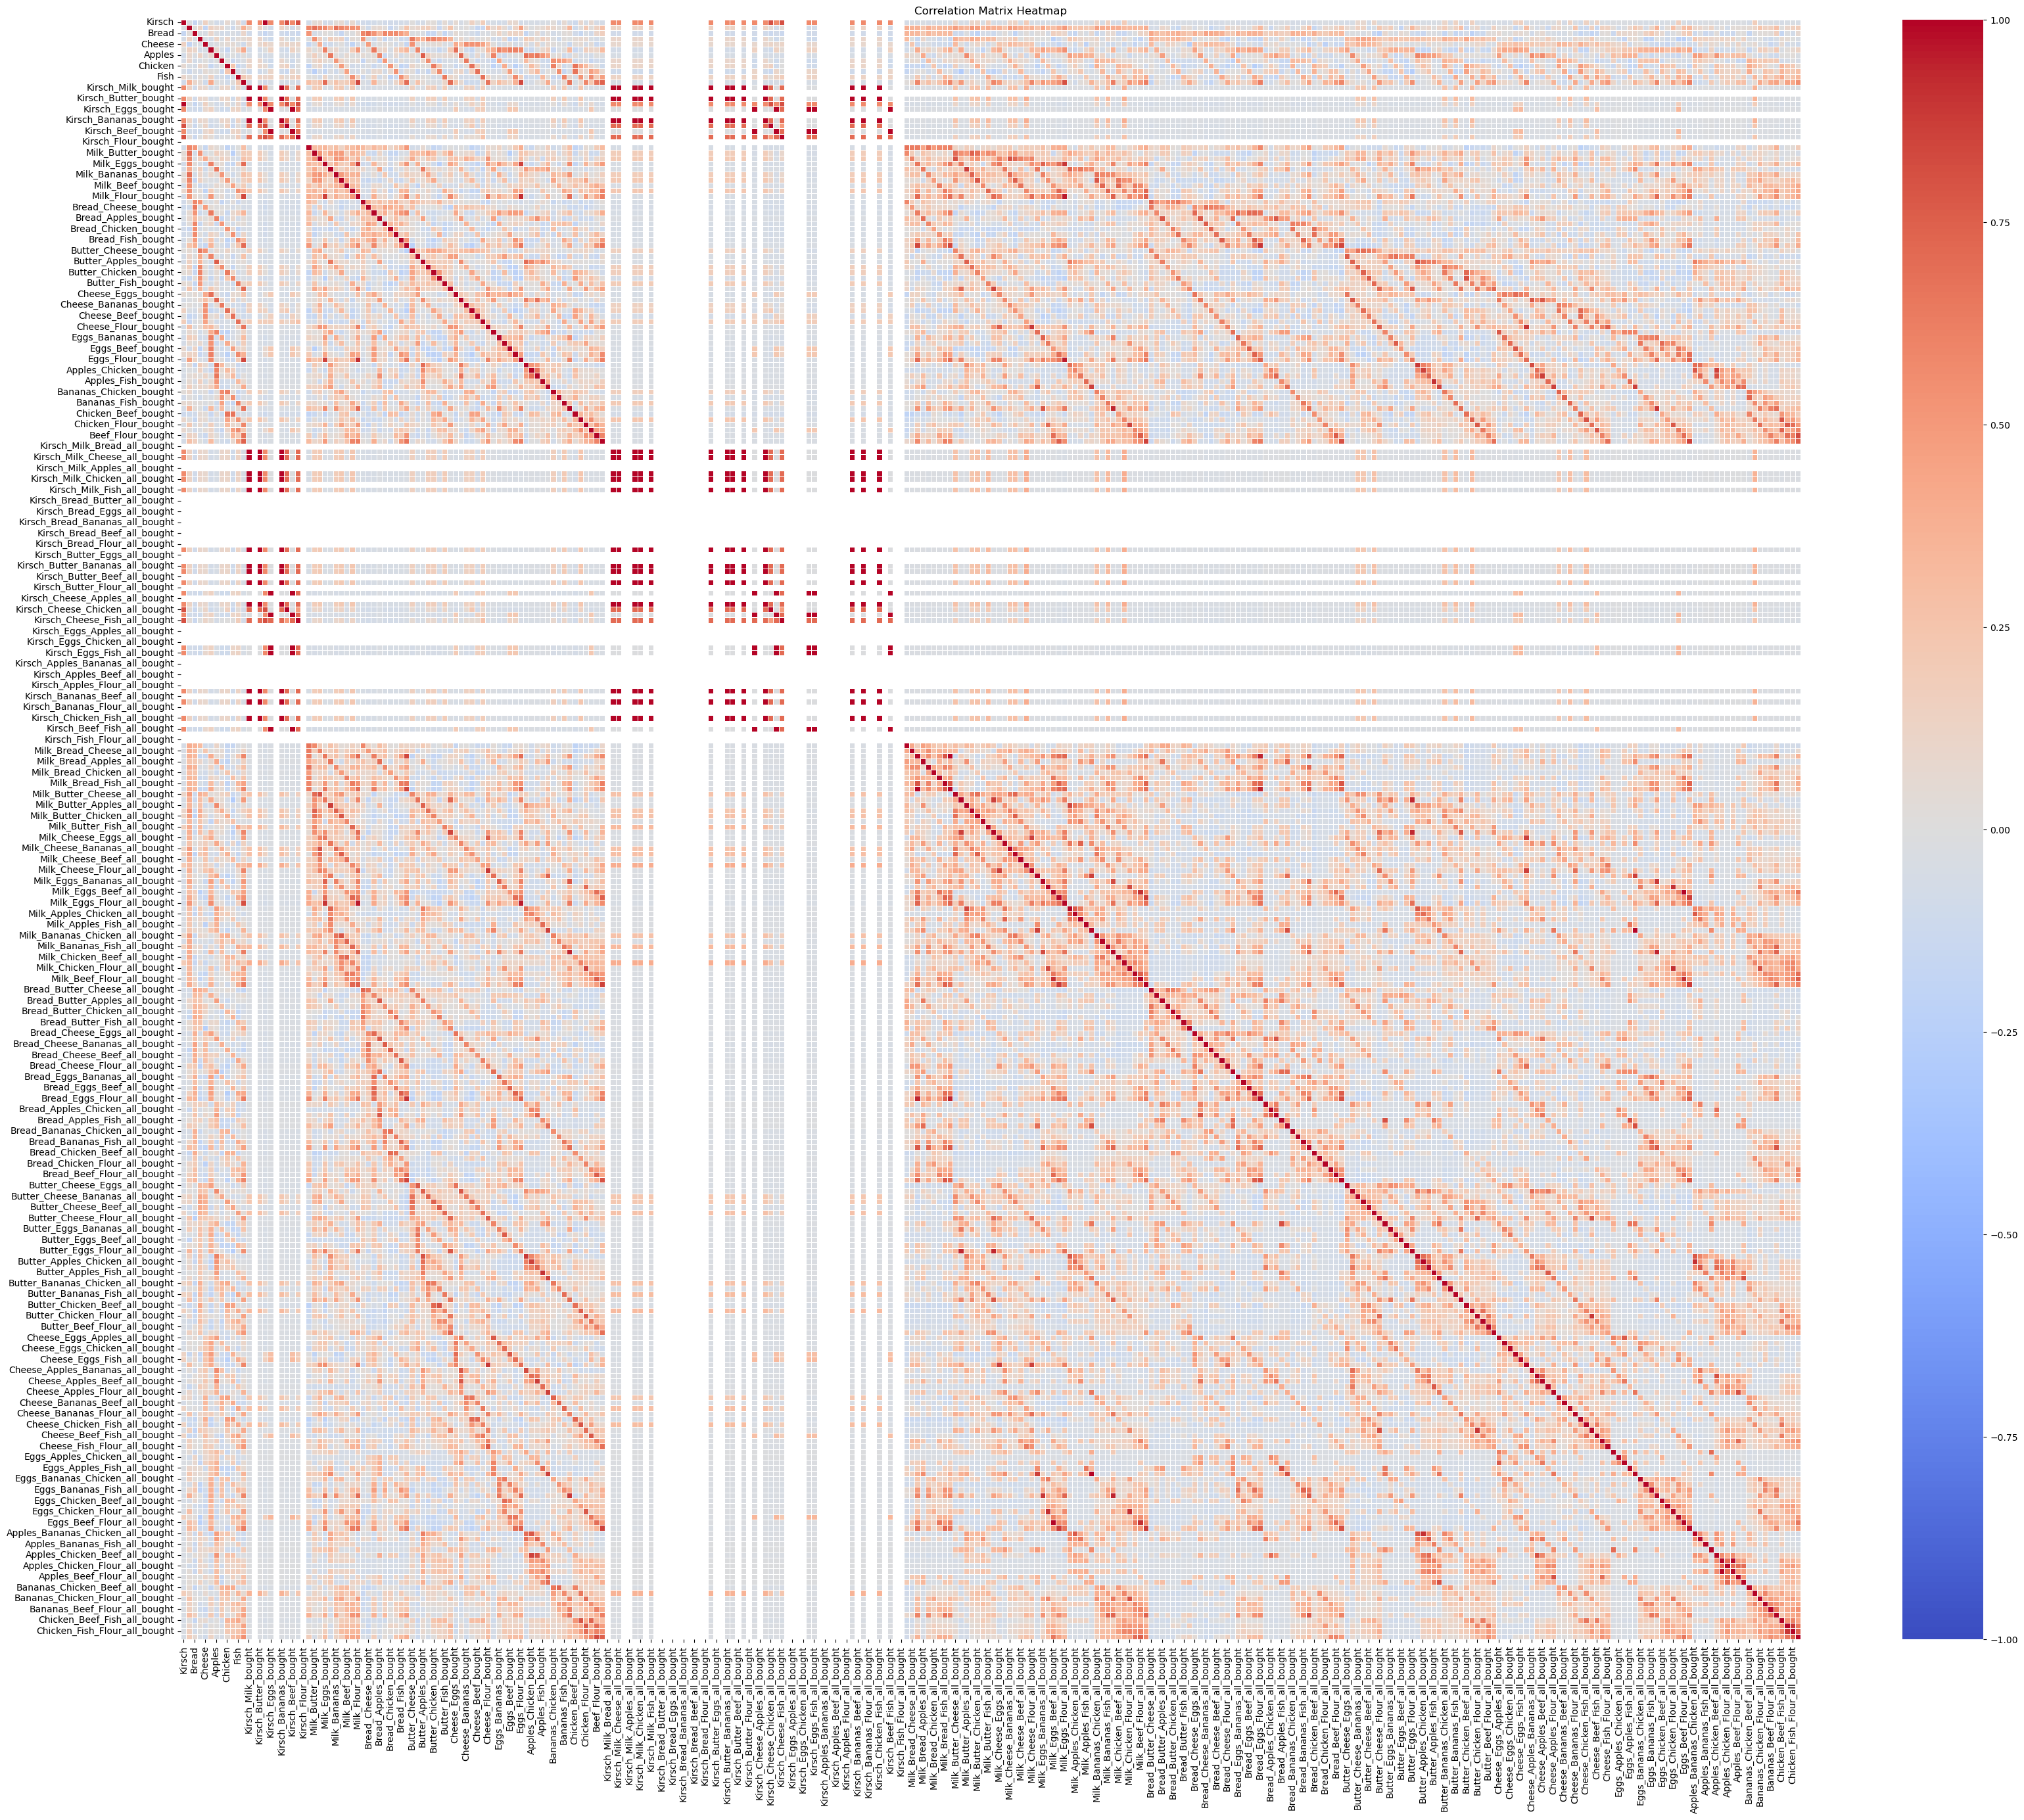

In [13]:
# Calculate the Pearson correlation matrix
correlation_matrix = df_triples.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

**Problem**: We have a total of 12 possible products which can be combined with each other. We need another solution for this..

## Frequent Itemset Mining

We can find frequent itemsets, which are groups of items that frequently appear together in transactions. We’ll use the `Apriori` algorithm from the `mlxtend` library to identify these itemsets based on a minimum support threshold.


In [14]:
# !pip install mlxtend

from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets with a minimum support threshold of 0.1
frequent_itemsets = apriori(df.astype(bool), min_support=0.1, use_colnames=True)

# Sort the itemsets by support in descending order
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)
frequent_itemsets

,support,itemsets
3,0.60,(Cheese)
6,0.53,(Bananas)
2,0.51,(Butter)
7,0.48,(Chicken)
8,0.48,(Beef)
...,...,...
75,0.10,"(Fish, Eggs, Bread)"
84,0.10,"(Fish, Bananas, Butter)"
91,0.10,"(Fish, Chicken, Cheese)"
94,0.10,"(Fish, Chicken, Beef)"


### Understanding Frequent Itemsets

Each row in the output represents an itemset (a set of items purchased together) and its support value. The support indicates how frequently the itemset appears in the dataset.


## Association Rule Generation

After identifying frequent itemsets, we can generate association rules. These rules help identify the probability of purchasing certain items given that others were bought. We’ll use confidence and lift metrics to evaluate the strength of each rule.


In [15]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules with a minimum confidence threshold of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=len(frequent_itemsets))

# Filter rules where antecedents have at most 2 items
rules = rules[rules['antecedents'].apply(lambda x: len(x) <= 2)]

# Sort the rules by confidence in descending order
rules = rules.sort_values(by="confidence", ascending=False)

# Display support, confidence, and lift of each rule
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]



,antecedents,consequents,support,confidence,lift
41,"(Flour, Eggs)",(Milk),0.14,0.933333,2.393162
42,"(Flour, Milk)",(Eggs),0.14,0.933333,2.666667
43,"(Eggs, Milk)",(Flour),0.14,0.823529,4.117647
37,(Flour),(Eggs),0.15,0.750000,2.142857
36,(Flour),(Milk),0.15,0.750000,1.923077
...,...,...,...,...,...
88,(Flour),(Bananas),0.10,0.500000,0.943396
89,(Flour),(Cheese),0.10,0.500000,0.833333
97,"(Chicken, Bread)",(Bananas),0.10,0.500000,0.943396
92,"(Cheese, Eggs)",(Bread),0.10,0.500000,1.111111


Thus, it seems that pancakes are often cooked. But what about "outliers", i.e., strong-confidence rules with a low support?

In [16]:
# Generate frequent itemsets with a minimum support threshold of 0.03
frequent_itemsets = apriori(df.astype(bool), min_support=0.03, use_colnames=True)

# Sort the itemsets by support in descending order
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)
frequent_itemsets

,support,itemsets
4,0.60,(Cheese)
7,0.53,(Bananas)
3,0.51,(Butter)
9,0.48,(Beef)
8,0.48,(Chicken)
...,...,...
435,0.03,"(Butter, Beef, Cheese, Bananas, Apples)"
437,0.03,"(Butter, Beef, Chicken, Cheese, Bananas)"
436,0.03,"(Butter, Beef, Chicken, Cheese, Apples)"
439,0.03,"(Butter, Chicken, Beef, Bananas, Apples)"


In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules with a minimum confidence threshold of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=len(frequent_itemsets))

# Filter rules where antecedents have at most 2 items
rules = rules[rules['antecedents'].apply(lambda x: len(x) <= 2)]

# Sort the rules by confidence in descending order
rules = rules.sort_values(by="confidence", ascending=False)

# Display support, confidence, and lift of each rule
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
770,(Kirsch),(Cheese),0.03,1.000000,1.666667
41,"(Flour, Eggs)",(Milk),0.14,0.933333,2.393162
42,"(Flour, Milk)",(Eggs),0.14,0.933333,2.666667
132,"(Bananas, Flour)",(Milk),0.09,0.900000,2.307692
335,"(Fish, Apples)",(Butter),0.05,0.833333,1.633987
...,...,...,...,...,...
696,"(Eggs, Apples)",(Milk),0.04,0.500000,1.282051
682,"(Chicken, Flour)",(Bananas),0.04,0.500000,0.943396
808,"(Fish, Apples)",(Cheese),0.03,0.500000,0.833333
835,"(Fish, Apples)","(Cheese, Butter)",0.03,0.500000,1.666667


### Explanation of Support, Confidence, and Lift

- **Support (of an itemset)**: Indicates how frequently the itemset appears in the dataset. Higher support means the itemset is more common among transactions.  
  The support of an itemset $X$ is calculated as:
  $$ \text{Support}(X) = \frac{\text{Number of transactions containing } X}{\text{Total number of transactions}} $$

- **Support (of an association rule)**: Indicates how frequently the itemset**s** appear together in the dataset. Higher support means the association rule can be seen more often among transactions. The support of an association rule $X \rightarrow Y$ is calculated as:
  $$ \text{Support}(X \rightarrow Y) = \frac{\text{Number of transactions containing } X \text{ and } Y}{\text{Total number of transactions}} = \text{Support}(X \cap Y)$$

- **Confidence**: Represents the probability that the consequent item(s) will be purchased given that the antecedent item(s) are purchased. Higher confidence suggests a stronger association between the items. The confidence of a rule $X \rightarrow Y$ (where $X$ is the antecedent and $Y$ is the consequent) is calculated as:
  $$ \text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cap Y)}{\text{Support}(X)} $$

- **Lift**: Measures the strength of an association by comparing the observed frequency with what would be expected if items were independent. A **lift greater than 1** indicates a positive association, meaning $X$ and $Y$ are more likely to be purchased together than would be expected by chance. A **lift of 1** indicates no association between $X$ and $Y$, meaning they are purchased together exactly as often as would be expected if they were independent. A **lift less than 1** indicates a negative association, meaning $X$ and $Y$ are less likely to be purchased together than would be expected by chance. The lift of a rule $X \rightarrow Y$ is calculated as:
  $$ \text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)} = \frac{\text{Support}(X \cap Y)}{\text{Support}(X) \times \text{Support}(Y)} $$

### Exercise 1 (Pen & Paper): Applying the Apriori Algorithm

In this exercise, you will apply the Apriori algorithm by hand on a small dataset to calculate supports, confidences, and lifts for item associations. This will help you understand the process of finding association rules without using code.

Consider the following transaction data:

| Transaction ID | Milk | Bread | Butter | Cheese | Eggs |
|----------------|------|-------|--------|--------|------|
| T1             | 1    | 1     | 0      | 1      | 0    |
| T2             | 0    | 1     | 1      | 1      | 1    |
| T3             | 1    | 1     | 1      | 0      | 1    |
| T4             | 1    | 0     | 1      | 1      | 1    |
| T5             | 0    | 1     | 0      | 0      | 1    |

Each item column contains `1` if the item was bought in the transaction, and `0` if it was not.

**Tasks**:

1. **Calculate Support**:  
   - Determine the support for each individual item (e.g., `Support(Milk)`).
   - Determine the support for pairs of items (e.g., `Support(Milk ∩ Bread)`).


2. **Calculate Confidence**:
   - Choose a few pairs of items to form rules´. We restrict ourselves to `Milk -> Bread`, `Bread -> Eggs`, `Butter -> Cheese`, and `Eggs -> Butter`.
   - Calculate the confidence for each rule. For example, to calculate `Confidence(Milk -> Bread)`, use:
     $$ \text{Confidence}(Milk \rightarrow Bread) = \frac{\text{Support}(Milk \cap Bread)}{\text{Support}(Milk)} $$

3. **Calculate Lift**:
   - For each your four rules, calculate the lift to understand the strength of the association. For example:
     $$ \text{Lift}(Milk \rightarrow Bread) = \frac{\text{Confidence}(Milk \rightarrow Bread)}{\text{Support}(Bread)} $$

**Questions**:
- Which item(s) have the highest support?
- Which association rule has the highest confidence?
- Interpret the lift values: Which pairs of items have strong or weak associations based on the lift?

Use this exercise to manually apply the Apriori algorithm and understand how association rules are generated and interpreted.



#### Solution (Exercise 1)

##### Step 1: Calculate Supports

1. **Individual Item Supports**:
   - Support(Milk) = 3/5 = 0.6
   - Support(Bread) = 4/5 = 0.8
   - Support(Butter) = 3/5 = 0.6
   - Support(Cheese) = 3/5 = 0.6
   - Support(Eggs) = 4/5 = 0.8

2. **Pair Item Supports**:
   - Support(Milk ∩ Bread) = 2/5 = 0.4
   - Support(Milk ∩ Butter) = 2/5 = 0.4
   - Support(Milk ∩ Cheese) = 2/5 = 0.4
   - Support(Milk ∩ Eggs) = 2/5 = 0.4
   - Support(Bread ∩ Butter) = 2/5 = 0.4
   - Support(Bread ∩ Cheese) = 2/5 = 0.4
   - Support(Bread ∩ Eggs) = 3/5 = 0.6
   - Support(Butter ∩ Cheese) = 2/5 = 0.4
   - Support(Butter ∩ Eggs) = 3/5 = 0.6
   - Support(Cheese ∩ Eggs) = 2/5 = 0.4

##### Step 2: Calculate Confidences

1. **Confidence for Some Rules**:
   - Confidence(Milk -> Bread) = Support(Milk ∩ Bread) / Support(Milk) = 0.4 / 0.6 = 0.67
   - Confidence(Bread -> Eggs) = Support(Bread ∩ Eggs) / Support(Bread) = 0.6 / 0.8 = 0.75
   - Confidence(Butter -> Cheese) = Support(Butter ∩ Cheese) / Support(Butter) = 0.4 / 0.6 = 0.67
   - Confidence(Eggs -> Butter) = Support(Butter ∩ Eggs) / Support(Eggs) = 0.6 / 0.8 = 0.75

##### Step 3: Calculate Lifts

1. **Lift for Some Rules**:
   - Lift(Milk -> Bread) = Confidence(Milk -> Bread) / Support(Bread) = 0.67 / 0.8 = 0.84
   - Lift(Bread -> Eggs) = Confidence(Bread -> Eggs) / Support(Eggs) = 0.75 / 0.8 = 0.94
   - Lift(Butter -> Cheese) = Confidence(Butter -> Cheese) / Support(Cheese) = 0.67 / 0.6 = 1.11
   - Lift(Eggs -> Butter) = Confidence(Eggs -> Butter) / Support(Butter) = 0.75 / 0.6 = 1.25

##### Summary

- **Highest Support**: Bread and Eggs, both with support of 0.8.
- **Highest Confidence**: Bread -> Eggs and Eggs -> Butter, both with a confidence of 0.75.
- **Interpretation of Lift**:
  - A lift value greater than 1 (e.g., Lift(Butter -> Cheese) = 1.11 and Lift(Eggs -> Butter) = 1.25) indicates a positive association, suggesting these items are more likely to be bought together than by chance.
  - Lift values less than 1 (e.g., Lift(Milk -> Bread) = 0.84) suggest a weaker association.


### Exercise 2 (Coding): Identifying Cocktail Trends from Liquor Store Purchases

In this exercise, you will analyze a liquor store's buying history dataset to uncover association rules and identify a cocktail trend.

**Instructions**:
1. **Load the Data**: Examine the dataset *liquor.csv*, where each row shows items purchased with `1` for bought and `0` for not bought.
2. **Association Rule Mining**: 
   - Use the Apriori algorithm to find frequent itemsets with an appropriate minimum support (hint: pick a lower support, such as 0.2).
   - Generate association rules and identify the strongest ones by confidence and lift.
3. **Identify this Summer's Drink**:
   - Analyze the top association rules to spot any patterns, such as items frequently bought together, that suggest this summer's **cocktail trend**.


#### Solution (Exercise 2)

In [18]:
# Load the sample transactional dataset
df = pd.read_csv("liquor.csv").astype(bool)

# Generate frequent itemsets with a minimum support threshold of 0.2
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules with a minimum confidence threshold of 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=len(frequent_itemsets))

# Sort the rules by confidence in descending order
rules = rules.sort_values(by="lift", ascending=False)

# Display support, confidence, and lift of each rule
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
4,"(Tequila, Triple sec)",(Lime Juice),0.220,0.948276,3.733370
8,(Lime Juice),"(Tequila, Triple sec)",0.220,0.866142,3.733370
6,"(Triple sec, Lime Juice)",(Tequila),0.220,0.894309,3.362064
7,(Tequila),"(Triple sec, Lime Juice)",0.220,0.827068,3.362064
2,(Lime Juice),(Tequila),0.220,0.866142,3.256172
1,(Tequila),(Lime Juice),0.220,0.827068,3.256172
5,"(Tequila, Lime Juice)",(Triple sec),0.220,1.000000,1.930502
0,(Lime Juice),(Triple sec),0.246,0.968504,1.869699
3,(Tequila),(Triple sec),0.232,0.872180,1.683746


![Alt text](https://spirituosenworld.de/images/cocktails/margarita-shortdrink.jpg.pagespeed.ce.kaHfrvdiXH.jpg)

### Exercise 3 (Pen & Paper): Finding Frequent Pairs

**Dataset**: You are provided with a dataset containing 20 items (`Item1`, `Item2`, ..., `Item20`) across 10 transactions. Each cell contains `1` if the item was present in the transaction, and `0` if it was not. Your goal is to find all **item pairs** with a support of at least 0.3.

Here’s the dataset:

| Transaction ID | Item1 | Item2 | Item3 | Item4 | Item5 | Item6 | Item7 | Item8 | Item9 | Item10 | Item11 | Item12 | Item13 | Item14 | Item15 | Item16 | Item17 | Item18 | Item19 | Item20 |
|----------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| T1             | 0     | 1     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 1      | 0      | 0      | 0      | 0      | 0      | 1      | 0      | 0      | 0      | 0      |
| T2             | 0     | 0     | 1     | 0     | 0     | 0     | 0     | 0     | 0     | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      |
| T3             | 0     | 0     | 0     | 1     | 0     | 0     | 0     | 0     | 0     | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 1      | 1      | 0      | 0      |
| T4             | 0     | 0     | 0     | 0     | 1     | 1     | 1     | 0     | 0     | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 1      | 1      | 0      |
| T5             | 1     | 0     | 0     | 0     | 0     | 1     | 0     | 0     | 1     | 1      | 1      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      |
| T6             | 0     | 0     | 1     | 0     | 0     | 0     | 0     | 0     | 0     | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      |
| T7             | 0     | 0     | 0     | 0     | 0     | 1     | 1     | 0     | 1     | 0      | 0      | 0      | 0      | 0      | 1      | 0      | 0      | 0      | 0      | 0      |
| T8             | 0     | 0     | 0     | 0     | 1     | 0     | 0     | 0     | 0     | 0      | 1      | 0      | 0      | 0      | 1      | 0      | 1      | 0      | 1      | 0      |
| T9             | 0     | 0     | 0     | 1     | 0     | 1     | 1     | 1     | 1     | 0      | 0      | 1      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 1      |
| T10            | 1     | 0     | 0     | 0     | 0     | 0     | 0     | 1     | 0     | 0      | 0      | 0      | 1      | 0      | 0      | 0      | 0      | 0      | 0      | 0      |


#### Solution (Exercise 3)

To solve this exercise efficiently, we can leverage the **Anti-Monotonicity of Support** property. This principle states that if an item does not meet the minimum support threshold individually, any pairs or supersets including that item will also not meet the minimum support threshold. Mathematically, we can express anti-monotonicity as follows:

$$
\text{If } \text{Support}(X) < {\text{support}}_{min} \Rightarrow \text{Support}(X \cap Y) < {\text{support}}_{min} \text{ for any } Y
$$

This means that if itemset $X$ does not meet the minimum support, then any larger itemset containing $X$ will also not meet the minimum support threshold. Therefore, we only need to consider item pairs where each item has support of at least 0.3.

##### Step 1: Calculate Individual Item Supports

First, we calculate the support of each item individually:

- **Support(Item6)**: Appears in 4 transactions, so support = 4/10 = 0.4
- **Support(Item7)**: Appears in 3 transactions, so support = 3/10 = 0.3
- **Support(Item9)**: Appears in 3 transactions, so support = 3/10 = 0.4

All other items have a support below 0.3. Thus, by the anti-monotonicity property, any pairs involving items other than **Item6**, **Item7**, and **Item9** cannot meet the minimum support threshold of 0.3. We can ignore them in our calculations.

##### Step 2: Calculate Pair Supports

Now, we only need to calculate the support for pairs involving **Item6**, **Item7**, and **Item9**:

1. **Support(Item6 ∩ Item7)**: Appears in 3 transactions (T4, T7, T9), so support = 3/10 = 0.3
2. **Support(Item6 ∩ Item9)**: Appears in 3 transactions (T5, T7, T9), so support = 3/10 = 0.3
3. **Support(Item7 ∩ Item9)**: Appears in 2 transactions (T7, T9), so support = 2/10 = 0.2

##### Final Frequent Pairs

The pairs with support of at least 0.3 are:

- **(Item6, Item7)** with support 0.3
- **(Item6, Item9)** with support 0.3


### Exercise 4 (Pen & Paper): Calculating a Top Border for Confidence with Limited Information

You are given two products, **A** and **B**, and the following information about their support:

- **Support(A)** = 0.4
- **Support(B)** = 0.3

You don’t have any information on how often **A** and **B** were bought together, i.e., you don’t know the support of the itemset $A \cap B$. However, you are still asked to provide an upper limit $\tau < 1$ for the **confidence** of the rule **A -> B** so that $\text{Confidence}(A \rightarrow B) \leq \tau$ holds.

#### Solution (Exercise 4)

Using the anti-monotonicity property of confidence, we know that the maximum confidence for **A -> B** occurs when all purchases of **B** also include **A**. Therefore, we assume the maximum possible overlap, which means the support of {A, B} would be equal to **Support(B)**. 

So, the upper limit for confidence is:

$$
\text{Confidence}(A \rightarrow B) = \frac{\text{Support}(A \cap B)}{\text{Support}(A)} \leq \frac{\text{Support}(B)}{\text{Support}(A)} = \frac{0.3}{0.4} = 0.75
$$

Therefore, the top border for the confidence of **A -> B** is **0.75**.

# Additional Material: Subgroup Discovery with WRACC

Subgroup discovery is a data mining technique used to identify interesting patterns within specific subgroups of a dataset in relation to a target variable. The goal is to find subgroups where certain attributes or combinations of attributes are associated with a particular outcome. Unlike **classification** or **clustering**, subgroup discovery focuses on identifying descriptive, interpretable patterns rather than grouping or predicting labels.

### How Subgroup Discovery Differs from Classification and Clustering

- **Subgroup Discovery vs. Classification**:
  - Classification aims to assign a class label to each instance in the dataset based on input features. The primary goal is **prediction**.
  - In contrast, subgroup discovery focuses on **description**: it identifies subgroups that are interesting with respect to the target variable but does not aim to classify every instance.
  - Subgroup discovery looks for patterns that reveal associations or characteristics related to the target variable, rather than trying to assign a definitive label.

- **Subgroup Discovery vs. Clustering**:
  - Clustering groups instances based on similarity without needing a target variable; it’s an **unsupervised** approach, often used to reveal natural groupings in the data.
  - Subgroup discovery, however, is a **supervised** approach and requires a target variable. It aims to find groups where particular attributes or attribute combinations are associated with the target outcome.
  - While clustering aims to create homogeneous groups based on similarity, subgroup discovery seeks interpretable patterns in relation to the target, which may be meaningful even if they don’t represent distinct clusters.

In this notebook, we’ll explore subgroup discovery using **Weighted Relative Accuracy (WRACC)**, a metric that measures the quality of a subgroup in terms of its association with the target variable.



## Introduction to WRACC

**Weighted Relative Accuracy (WRACC)** evaluates the quality of a subgroup by comparing the proportion of the target class within the subgroup to its overall proportion in the dataset. A positive WRACC value indicates that the subgroup is more likely to contain the target class than the dataset as a whole.

### WRACC Formula

The formula for WRACC is:

$$
\text{WRACC} = \frac{|S|}{|D|} \cdot \left(\frac{|S_T|}{|S|} - \frac{|T|}{|D|}\right)
$$

where:
- $D$: all instances,
- $T \subseteq D$: the target class instances in the entire dataset.
- $S$: the subgroup,
- $S_T := S \cap T$: the target class instances within the subgroup,


## Step 1: Load and Explore the Data

We’ll use a small dataset with attributes related to customer characteristics and a target variable indicating whether a customer purchased Product A. Our goal is to identify subgroups associated with purchasing Product A.

| Age | Income | Purchases_Product_A |
|-----|--------|----------------------|
| 25  | High   | 1                    |
| 45  | Low    | 0                    |
| 35  | Medium | 1                    |
| 50  | High   | 1                    |
| 23  | Low    | 0                    |
| 34  | Medium | 1                    |
| 42  | High   | 1                    |
| 36  | Low    | 0                    |
| 27  | Medium | 1                    |
| 40  | High   | 1                    |

We’ll define **Purchases_Product_A** as our target variable and use WRACC to evaluate subgroups defined by other attributes, such as Income level.


In [19]:
# Step 1: Load the data into a DataFrame
import pandas as pd

data = {
    'Age': [25, 45, 35, 50, 23, 34, 42, 36, 27, 40],
    'Income': ['High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High'],
    'Purchases_Product_A': [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Display the dataset
df


,Age,Income,Purchases_Product_A
0,25,High,1
1,45,Low,0
2,35,Medium,1
3,50,High,1
4,23,Low,0
5,34,Medium,1
6,42,High,1
7,36,Low,0
8,27,Medium,1
9,40,High,1


## Step 2: Calculate WRACC for a Subgroup

Let’s calculate WRACC for the subgroup where customers have `High` income. This will give us an understanding of how strongly this subgroup is associated with purchasing Product A.


In [20]:
def get_wracc(subgroup_criteria):
    
    # Calculate relevant counts
    D = len(df)  # Total number of instances
    D_target = df[target_variable].sum()  # Total number of positive target instances
    S = df[subgroup_criteria].shape[0]  # Number of instances in the subgroup
    S_target = df[subgroup_criteria][target_variable].sum()  # Number of positive target instances in the subgroup
    
    # Calculate WRACC
    WRACC = (S / D) * ((S_target / S) - (D_target / D))
    print(WRACC)

# Define target and subgroup criteria
target_variable = 'Purchases_Product_A'
subgroup_criteria = (df['Income'] == 'High')

get_wracc(subgroup_criteria)


0.12000000000000002


### Interpreting WRACC

The WRACC value tells us how strongly the subgroup (e.g., customers with `High` income) is associated with purchasing Product A. A positive WRACC value suggests that customers in this subgroup are more likely to purchase Product A compared to the overall dataset. 

Now let’s try different subgroups to compare WRACC values and see which subgroup is most associated with Product A.


In [21]:
# Step 3: Experiment with another subgroup, for example, Age > 30
subgroup_criteria = (df['Age'] > 30)

get_wracc(subgroup_criteria)

subgroup_criteria = (df['Income'] == 'Low')

get_wracc(subgroup_criteria)


0.010000000000000042
-0.21


## Programmatically Compute WRACC Scores for Subgroups

In this task, you are required to programmatically compute the **WRACC** (Weighted Relative Accuracy) scores for potential subgroups within the provided dataset.

Your objective is to identify interesting subgroups that are strongly associated with the target variable, `Purchases_Product_A`. Specifically, you should analyze subgroups defined by:
- **Income** (categories: High, Medium, Low)
- **Age** (by discretizing into intervals <30, 30-40, >40)

For each combination of `Income` and `Age` interval, calculate the WRACC score. After completing the calculations, identify the subgroups with the highest WRACC scores, as these represent the most interesting patterns in the dataset.

Hint: You may use external tools or packages to assist with calculations (see pysubgroup), but make sure to implement a solution that explores all relevant subgroups.

Using the `pysubgroup` library, we can automatically compute WRACC scores for subgroups. By defining a target variable and a quality measure (in this case, WRACC), `pysubgroup` identifies and ranks the most interesting subgroups based on their WRACC values. This automation saves time and provides a systematic approach to subgroup discovery, highlighting patterns in the data that are strongly associated with the target variable.

In [23]:
#!pip install pysubgroups
import pandas as pd
import pysubgroup as ps

# Load a sample dataset
data = {
    'Age': [25, 45, 35, 50, 23, 34, 42, 36, 27, 40],
    'Income': ['High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High'],
    'Purchases_Product_A': [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Define the target variable for subgroup discovery
target = ps.BinaryTarget('Purchases_Product_A', 1)

# Define the search space with specific Age groups and Income categories
search_space = [
    ps.EqualitySelector('Income', val) for val in df['Income'].unique()
] + [
    ps.IntervalSelector('Age', 0, 30),    # Age group <30
    ps.IntervalSelector('Age', 30, 40),   # Age group 30-40
    ps.IntervalSelector('Age', 40, 100)   # Age group >40
]

# Set WRACC as the quality measure
quality_measure = ps.WRAccQF()

# Define the subgroup discovery task
task = ps.SubgroupDiscoveryTask(df, target, search_space, result_set_size=14, qf=quality_measure)

# Run the subgroup discovery algorithm using BeamSearch
result = ps.BeamSearch().execute(task)

# Convert the result to a DataFrame and display
result_df = result.to_dataframe()
print(result_df[['subgroup', 'quality']])


                             subgroup  quality
0                      Income=='High'     0.12
1                    Income=='Medium'     0.09
2    Age: [40:100[ AND Income=='High'     0.09
3   Age: [30:40[ AND Income=='Medium'     0.06
4    Age: [0:30[ AND Income=='Medium'     0.03
5      Age: [0:30[ AND Income=='High'     0.03
6                       Age: [40:100[     0.02
7                             Dataset     0.00
8                        Age: [30:40[    -0.01
9                         Age: [0:30[    -0.01
10    Age: [40:100[ AND Income=='Low'    -0.07
11     Age: [30:40[ AND Income=='Low'    -0.07
12      Age: [0:30[ AND Income=='Low'    -0.07
13                      Income=='Low'    -0.21


## Conclusion

By calculating WRACC for different subgroups, we can identify patterns in our data. Subgroups with higher WRACC values are more strongly associated with the target variable (Purchasing Product A) compared to the overall dataset. This approach is a valuable tool in subgroup discovery and can reveal meaningful patterns within complex datasets.
